In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt
from stellr import Optimizer
from corner import corner

In [2]:
paths_dict = {
    'NP': 'stars_results/test/stars',
    'PP10': 'population_results/test_10/population/stars',
    'PP50': 'population_results/test_50/population/stars',
    'PP100': 'population_results/test_100/population/stars',
    'MP': 'population_results/test_max_pool/population/stars',
}

stars = {}
for key, val in paths_dict.items():
    stars[key] = pd.read_csv(os.path.join(val, 'results.csv'))

In [3]:
latex_varnames = {
    'mass': [r'M', r'(\mathrm{M}_\odot)'],
    'rad': [r'R', r'(\mathrm{R}_\odot)'],
    'lum': [r'L', r'(\mathrm{L}_\odot)'],
    'age': [r'\mathrm{age}', r'(\mathrm{Gyr})'],
    'yi': [r'Y_\mathrm{init}', ''],
    'zi': [r'Z_\mathrm{init}', ''],
    'mlt': [r'\alpha_\mathrm{mlt}', ''],
    'mhi': [r'[\mathrm{M}/\mathrm{H}]_\mathrm{init}', r'(\mathrm{dex})'],
    'mhs': [r'[\mathrm{M}/\mathrm{H}]_\mathrm{surf}', r'(\mathrm{dex})'],
    'f_evol': [r'f_\mathrm{evol}', ''],
}

kde_kws = {
    'NP': dict(color='C0'),
    'PP10': dict(color='C1', linestyle=':'),
    'PP50': dict(color='C1', linestyle='--'),
    'PP100': dict(color='C1'),
    'MP': dict(color='C2'),
}

hist_kws = {
    'NP': dict(color='C0', edgecolor='C0'),
    'PP10': dict(color='C1', hatch='..', edgecolor='C1'),
    'PP50': dict(color='C1', hatch='//', edgecolor='C1'),
    'PP100': dict(color='C1', edgecolor='C1'),
    'MP': dict(color='C2', edgecolor='C2'),
}

In [27]:
def plot_shrinkage(var_name, ax=None, subplot_kwargs={}):
    if ax is None:
        fig, ax = plt.subplots(**subplot_kwargs)
    for key, val in stars.items():
        col = f'{var_name}_sd'
        if col in val.columns:
            gs = sns.distplot(val[col],
                              hist=False,
                              hist_kws=hist_kws[key],
                              label=key, kde_kws=kde_kws[key],
                              ax=ax)
#     ax = gs.axes
#     ax.legend()
    ax.get_legend().remove()
    ax.set_xlabel(r'$\sigma_{' + latex_varnames[var_name][0] + r'}\,' +  latex_varnames[var_name][1] + r'$')
#     ax.set_ylabel('KDE')
    return ax

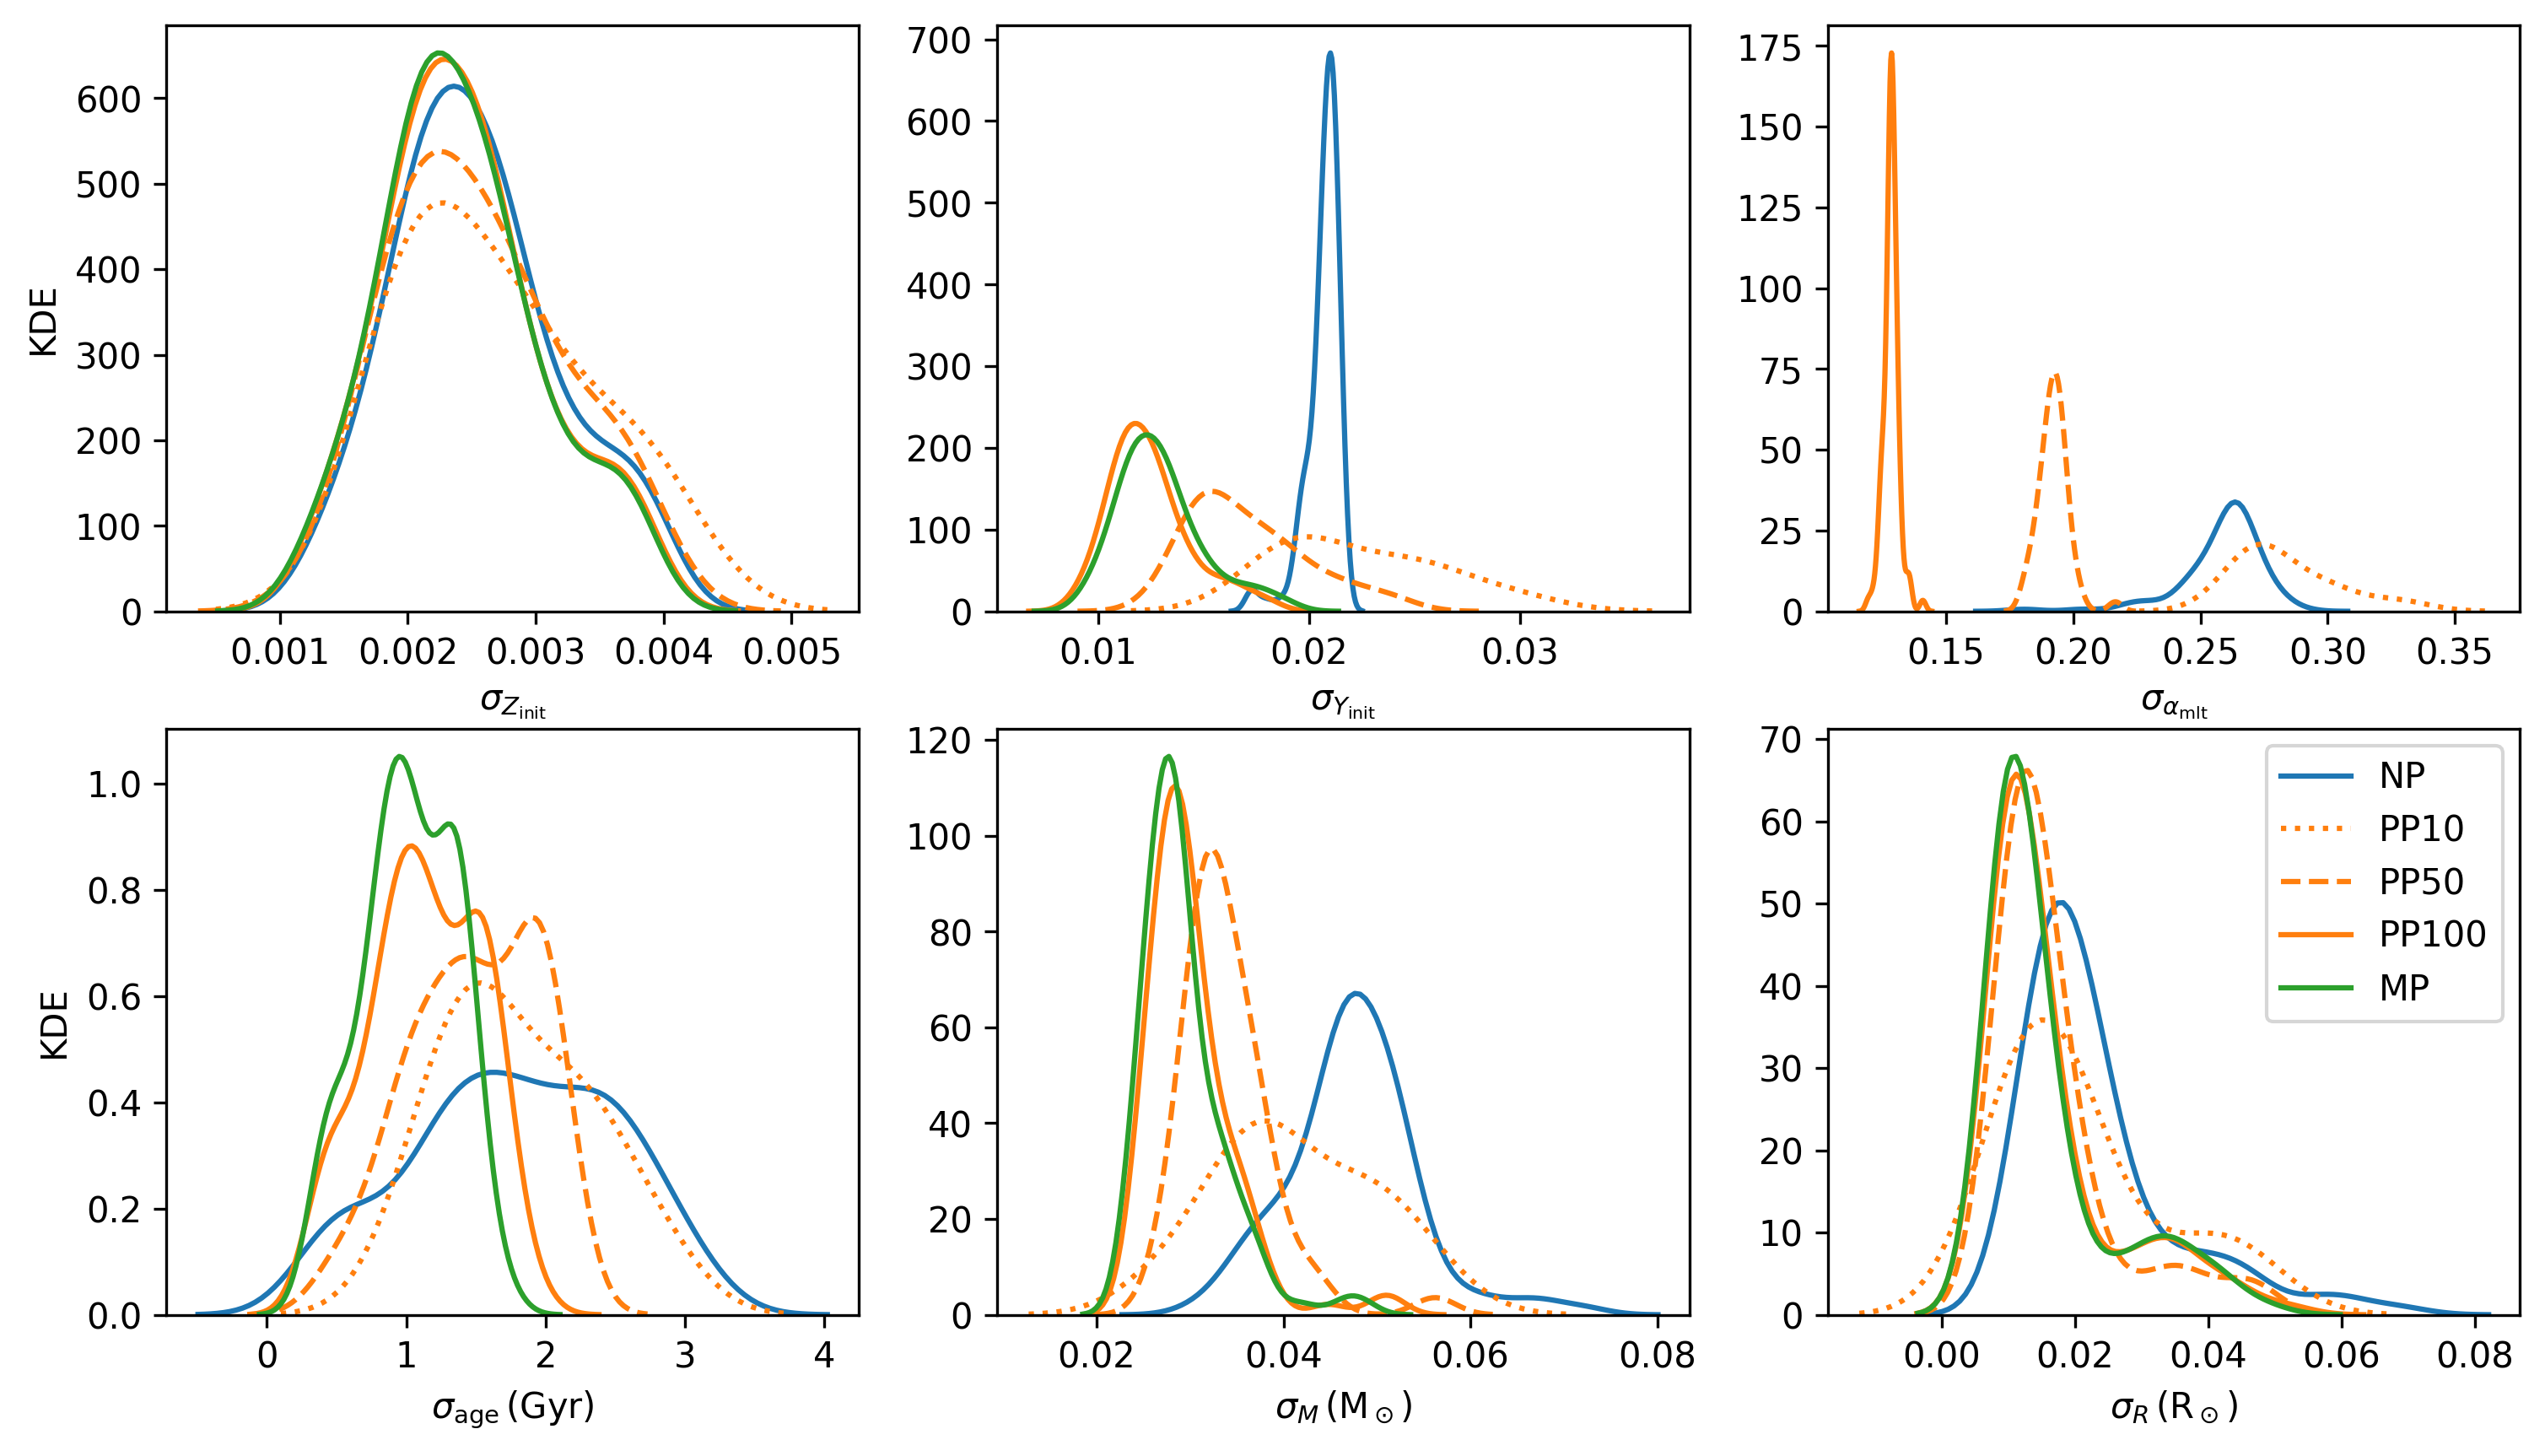

In [33]:
columns = ['zi', 'yi', 'mlt', 'age', 'mass', 'rad']

fig, axes = plt.subplots(2, 3, dpi=300, figsize=(12, 6.75))

for col, ax in zip(columns, axes.flatten()):
    plot_shrinkage(col, ax=ax)
    if ax in [axes[0, 0], axes[1, 0]]:
        ax.set_ylabel('KDE')
ax.legend()

In [35]:
fig.savefig('../../paper/figures/shrinkage.png', bbox_inches='tight')

In [85]:
outputs = pd.read_csv('../../data/tracks/test_stars/test_stars_outputs.csv')
outputs.head()

,index,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,star_mass,star_age,frac_age,effective_T,luminosity,radius,log_g,surface_he4,surface_Z,star_feh,delta_nu_fit,frac_evol,age_weights
0,0,1.0,0.85397,0.25364,0.014426,0.03700,2.00798,0.85397,7.046015,0.398266,5200.535430,0.445522,0.823374,4.538138,0.228446,0.013172,-0.017916,167.944271,0.398266,0.199418
1,1,1.0,0.85854,0.27288,0.017527,0.13517,1.84533,0.85854,7.349840,0.435597,5169.130768,0.460919,0.847689,4.515177,0.244816,0.015969,0.076846,161.360379,0.435597,0.196443
2,2,1.0,0.86302,0.29363,0.028322,0.36335,1.99334,0.86302,3.216747,0.174959,4893.183014,0.323551,0.792587,4.575816,0.282007,0.027385,0.340614,178.462162,0.174959,0.033333
3,3,1.0,0.86445,0.27088,0.012056,-0.03175,1.89884,0.86445,5.086326,0.372984,5427.143855,0.555922,0.844546,4.521383,0.246552,0.011104,-0.082774,162.451236,0.372984,0.126204
4,4,1.0,0.86455,0.28837,0.018435,0.16724,1.90678,0.86455,7.930125,0.528107,5297.480060,0.542283,0.875454,4.490213,0.255423,0.016633,0.101207,154.279390,0.528107,0.179025


In [86]:
rename_cols = {
    'index': 'name',
    'frac_evol': 'f_evol_true',
    'initial_mass': 'mass_true',
    'initial_MLT': 'mlt_true',
    'initial_Yinit': 'yi_true',
    'initial_Zinit': 'zi_true',
    'initial_feh': 'mhi_true',
    'star_age': 'age_true',
    'effective_T': 'teff_true',
    'radius': 'rad_true',
    'luminosity': 'lum_true',
    'delta_nu_fit': 'dnu_true',
    'star_feh': 'mhs_true',
}

truths = outputs.loc[:, rename_cols.keys()].rename(columns=rename_cols)
truths.head()

,name,f_evol_true,mass_true,mlt_true,yi_true,zi_true,mhi_true,age_true,teff_true,rad_true,lum_true,dnu_true,mhs_true
0,0,0.398266,0.85397,2.00798,0.25364,0.014426,0.03700,7.046015,5200.535430,0.823374,0.445522,167.944271,-0.017916
1,1,0.435597,0.85854,1.84533,0.27288,0.017527,0.13517,7.349840,5169.130768,0.847689,0.460919,161.360379,0.076846
2,2,0.174959,0.86302,1.99334,0.29363,0.028322,0.36335,3.216747,4893.183014,0.792587,0.323551,178.462162,0.340614
3,3,0.372984,0.86445,1.89884,0.27088,0.012056,-0.03175,5.086326,5427.143855,0.844546,0.555922,162.451236,-0.082774
4,4,0.528107,0.86455,1.90678,0.28837,0.018435,0.16724,7.930125,5297.480060,0.875454,0.542283,154.279390,0.101207


In [165]:
kde_defaults = dict(linewidth=1, alpha=0.75)

def plot_true(var_name, stat='50th'):

    delta = {}
    for key, val in stars.items():
        df = truths.merge(val, on='name')
        delta[f'true - {key}'] =  (df['_'.join([var_name, 'true'])] - df['_'.join([var_name, stat])])  
#             df['_'.join([var_name, 'sd'])]
    
    fig, ax = plt.subplots(figsize=(3.8, 3.2), dpi=300)
    
    for (label, d), key in zip(delta.items(), stars.keys()):
        if key in ['PP10', 'PP50']:
            continue
        sns.distplot(d, label=label,
#                      hist=False, 
                     ax=ax, kde_kws=dict(kde_defaults, **kde_kws[key]),
                     hist_kws=hist_kws[key])
    ax.axvline(color='k', linestyle='--', linewidth=1)
    ax.legend() 

    ax.set_xlabel(r'$\Delta ' + latex_varnames[var_name][0] + r'\,' +  latex_varnames[var_name][1] + r'$')
    ax.set_ylabel('KDE')
    
    return fig

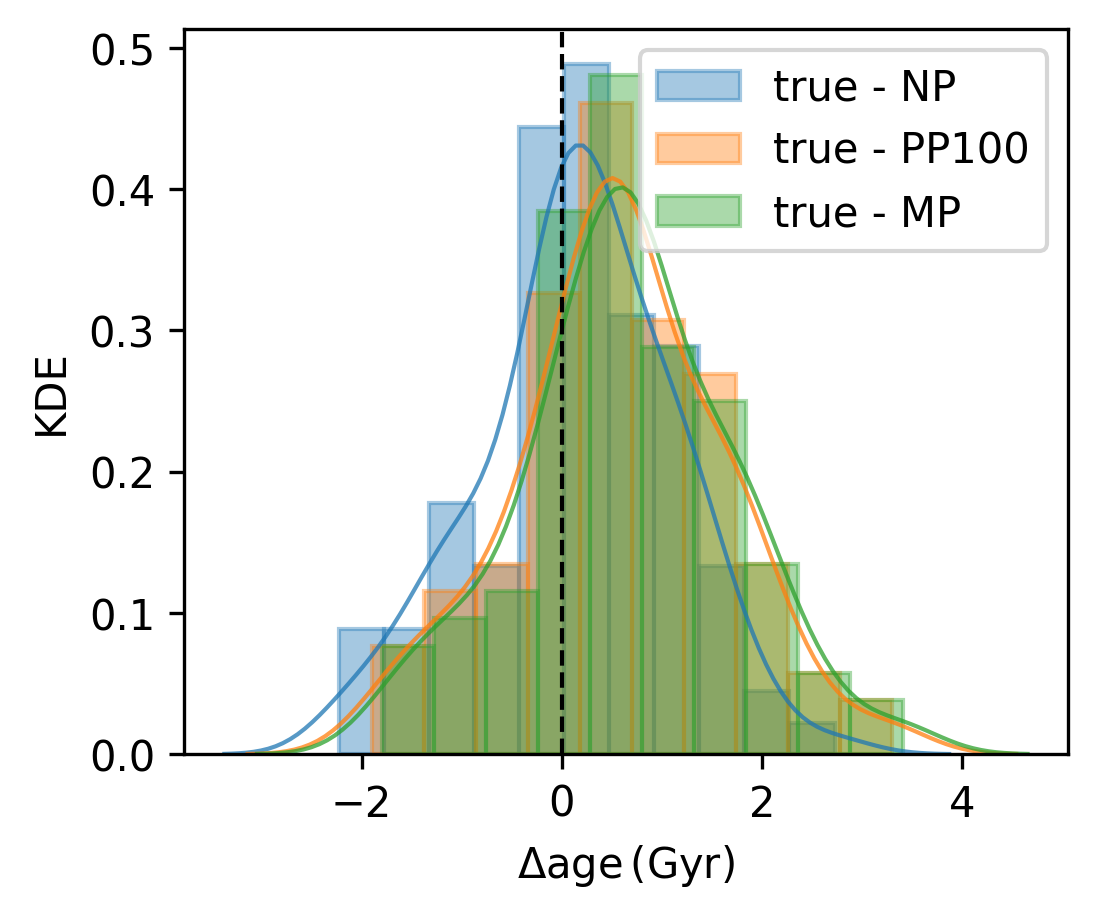

In [166]:
plot_true('age');

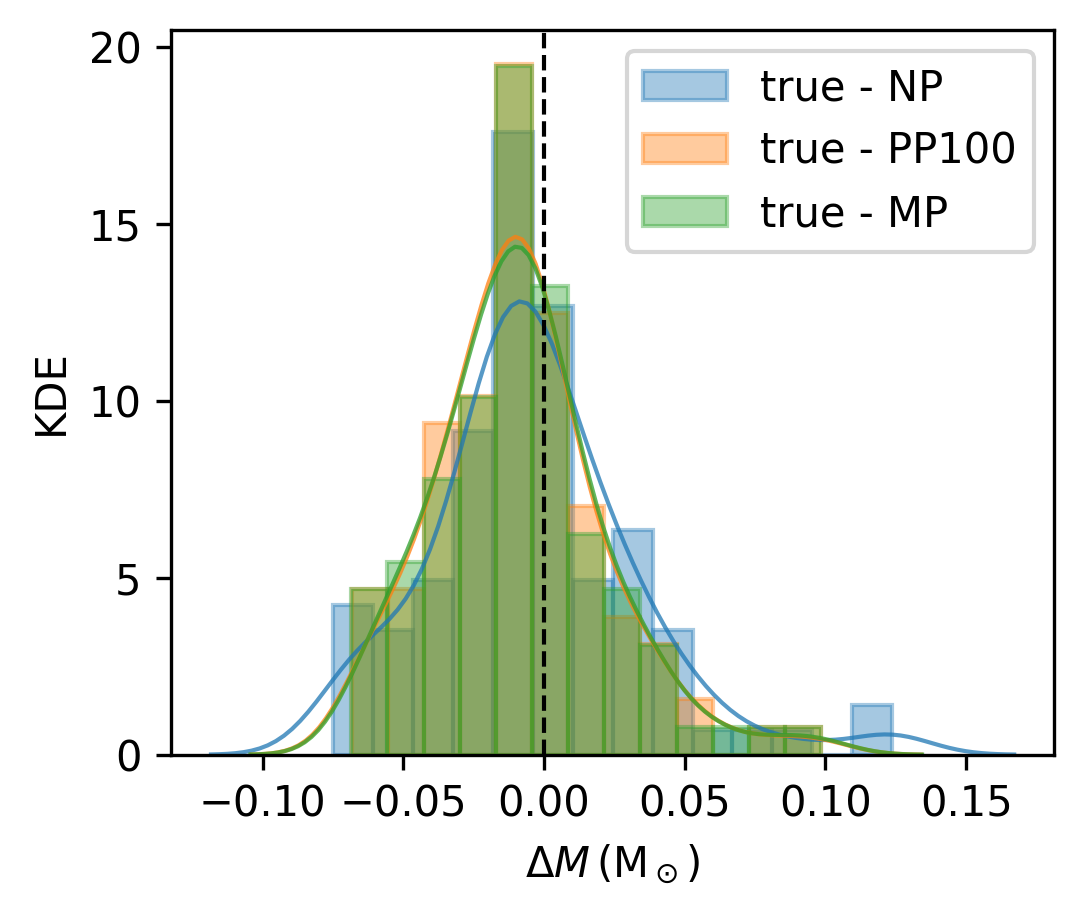

In [167]:
plot_true('mass');

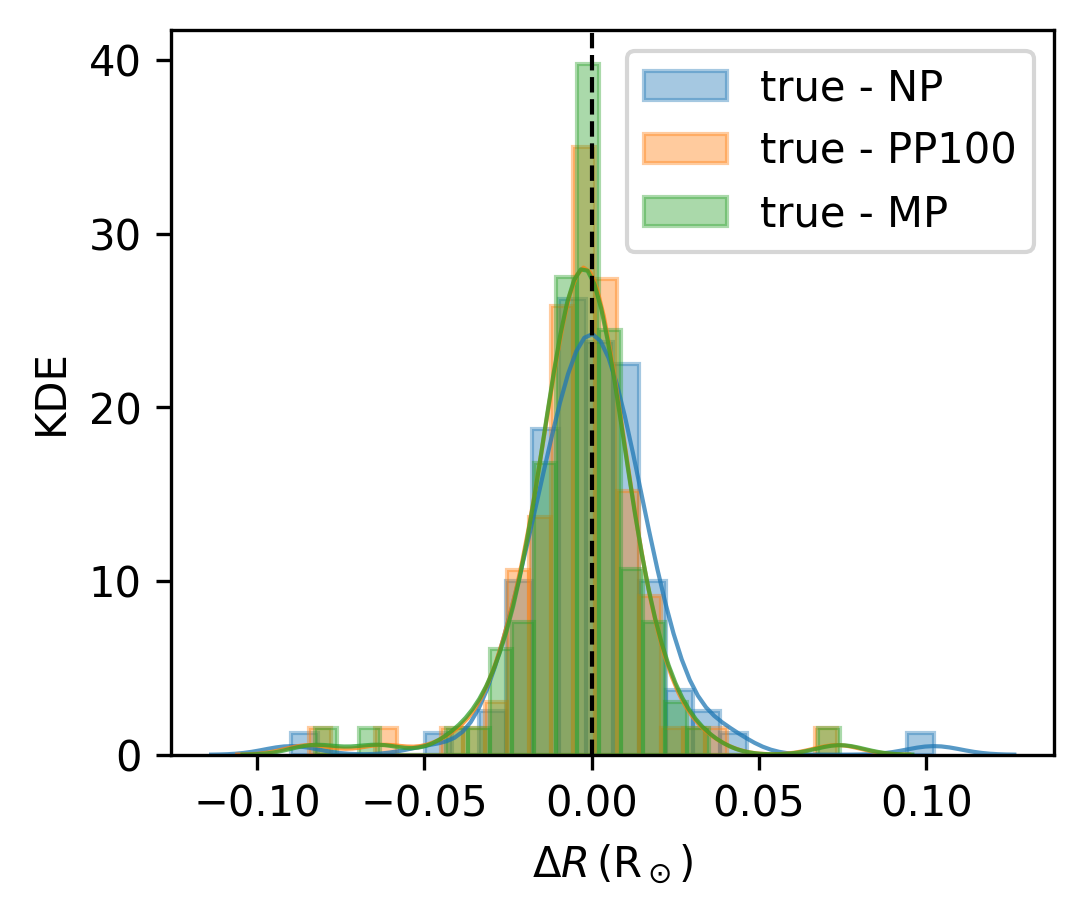

In [168]:
plot_true('rad');

In [181]:
kde_defaults = dict(linewidth=1, alpha=0.75)

def plot_true(var_name, stat='mean'):

    delta = {}
    for key, val in stars.items():
        df = truths.merge(val, on='name')
        delta[key] =(df['_'.join([var_name, 'true'])] - df['_'.join([var_name, stat])]) / \
            df['_'.join([var_name, 'sd'])]
    
    fig, ax = plt.subplots(figsize=(3.8, 3.2), dpi=300)
    
    for (label, d), key in zip(delta.items(), stars.keys()):
        if key in ['PP10', 'PP50']:
            continue
        sns.distplot(d, label=label,
#                      hist=False, 
                     ax=ax, kde_kws=dict(kde_defaults, **kde_kws[key]),
                     hist_kws=hist_kws[key])
    ax.axvline(color='k', linestyle='--', linewidth=1)
    ax.legend() 

    lvar = latex_varnames[var_name]
    ax.set_xlabel(r'$(' + lvar[0] + r'_\mathrm{true} - \mu_{' +  
                  lvar[0] + r'} ) / \sigma_{' +  lvar[0] + '}$')
    ax.set_ylabel('KDE')
    
    return fig

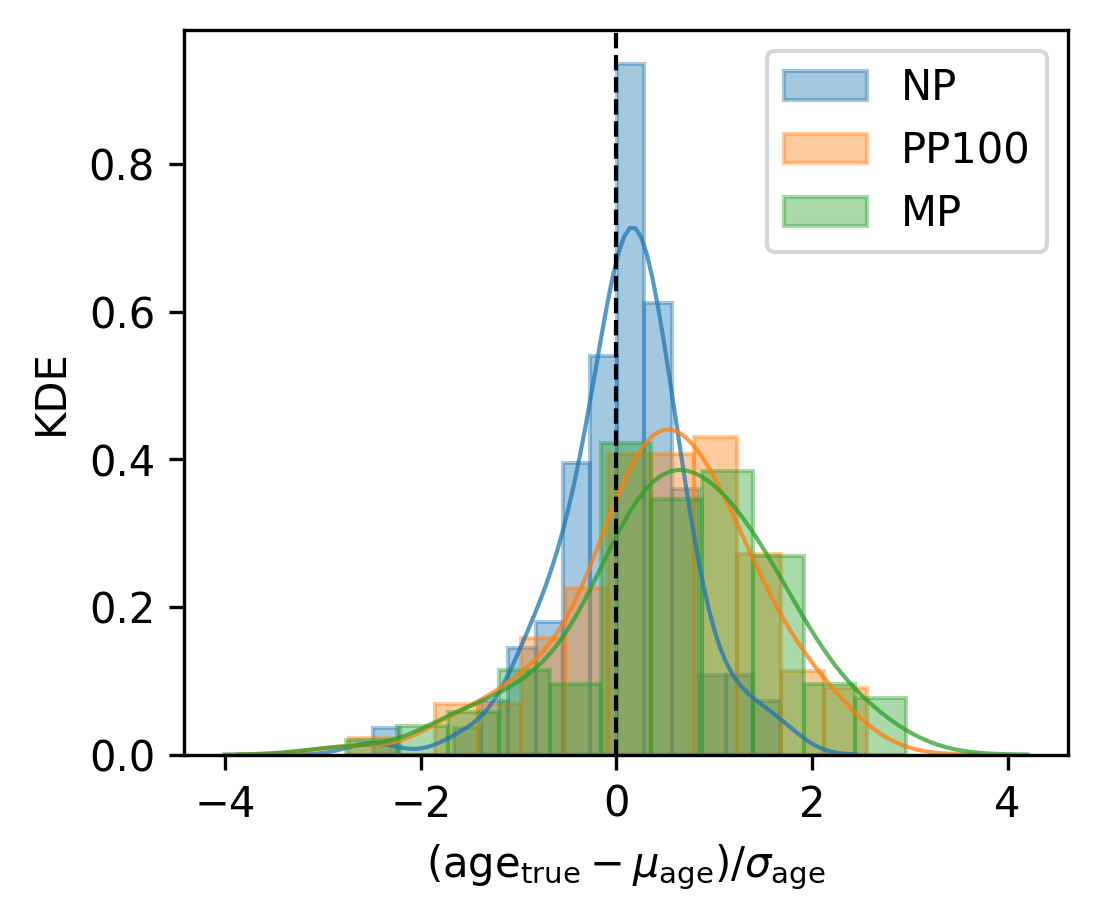

In [182]:
plot_true('age');

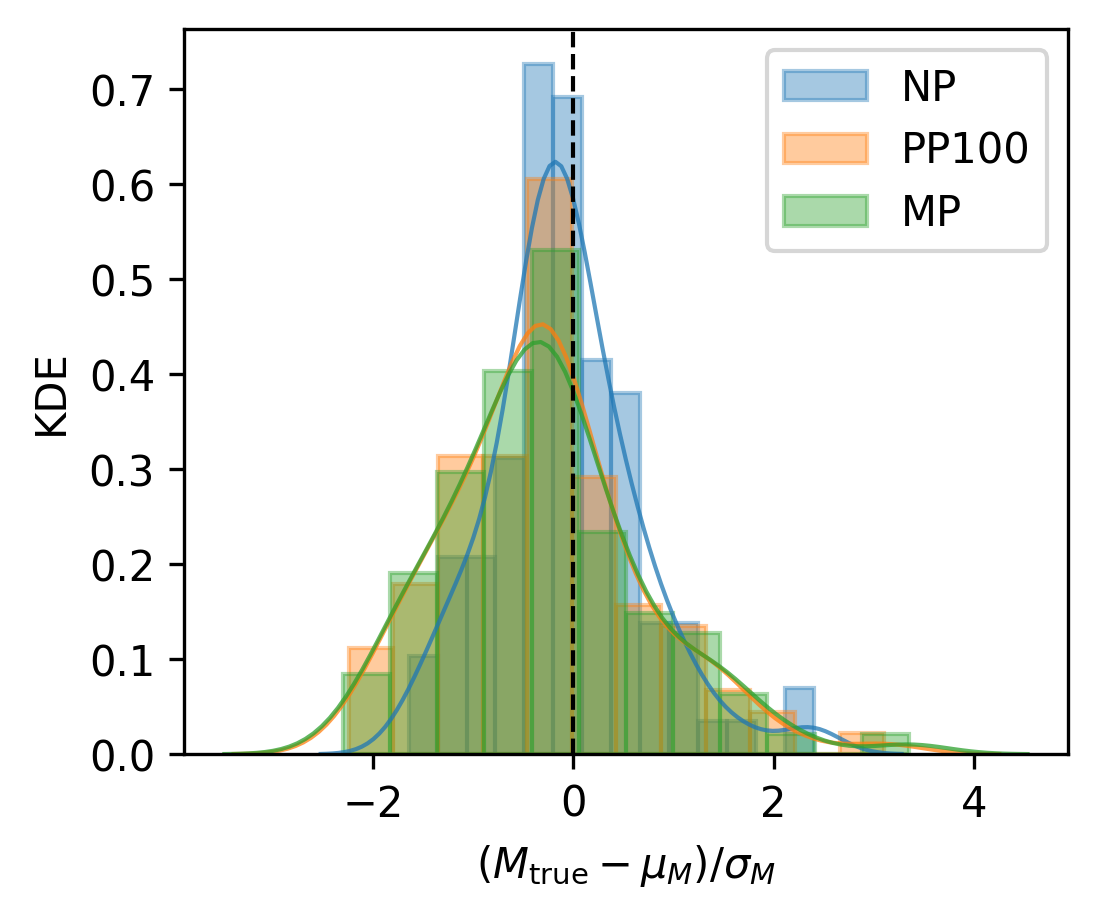

In [183]:
plot_true('mass');

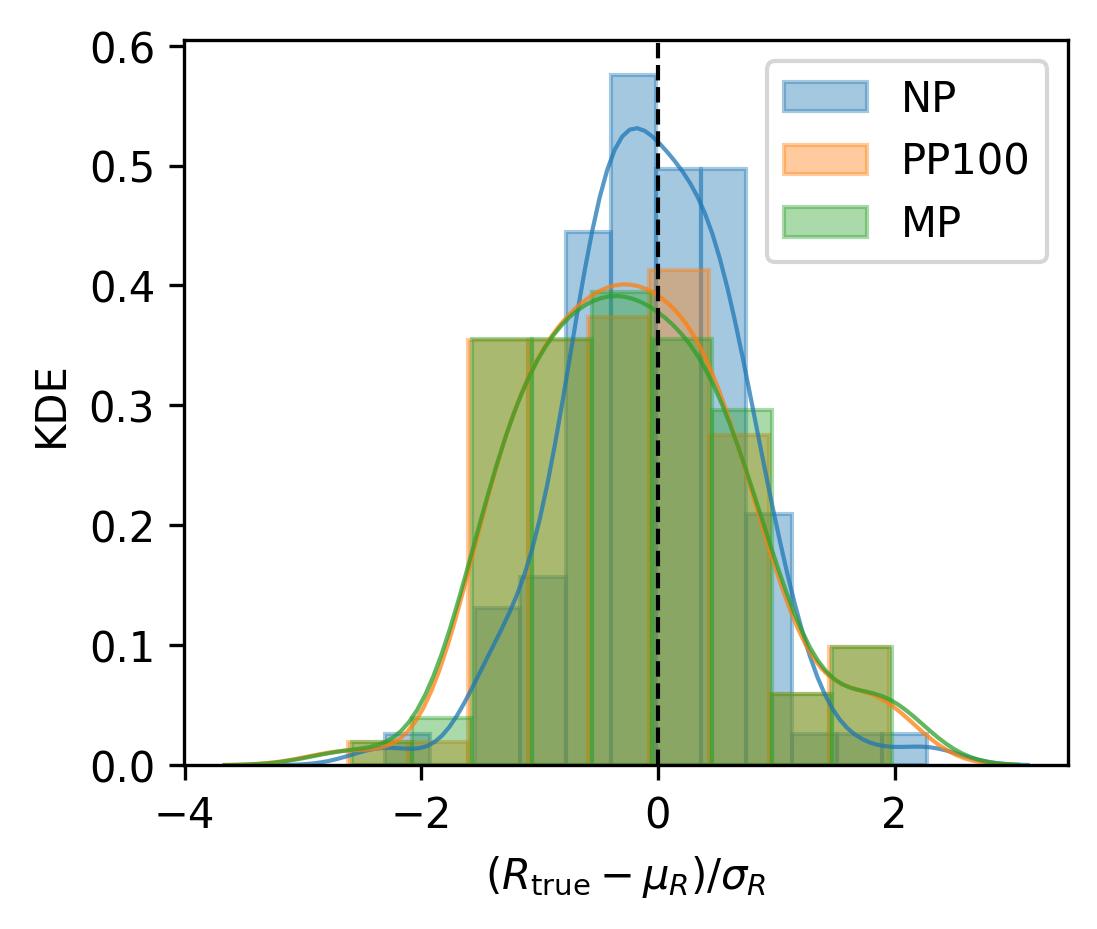

In [184]:
plot_true('rad');

In [187]:
kde_defaults = dict(linewidth=1, alpha=0.75)

def plot_diff(var_name, stat='50th'):

    delta = {}
    for key, val in stars.items():
        if key == 'NP':
            continue

        df = stars['NP'].merge(val, on='name')
        delta[key] =  (df['_'.join([var_name, stat, 'x'])] - df['_'.join([var_name, stat, 'y'])])
    
    fig, ax = plt.subplots(figsize=(3.8, 3.2), dpi=300)
    
    keys = [key for key in stars.keys()]
    for (label, d), key in zip(delta.items(), keys[1:]):
        sns.distplot(d, label=label,
#                      hist=False, 
                     ax=ax, kde_kws=dict(kde_defaults, **kde_kws[key]),
                     hist_kws=hist_kws[key])
    ax.axvline(color='C0', linestyle='--', linewidth=1)
    ax.legend() 

    lvar = latex_varnames[var_name]
    ax.set_xlabel(r'$' + lvar[0] + r'_\mathrm{NP} - ' + lvar[0] + r'$')
    
#     ax.set_xlabel(r'$\Delta ' + latex_varnames[var_name][0] + r'\,' +  latex_varnames[var_name][1] + r'$')
    ax.set_ylabel('KDE')
    
    return fig

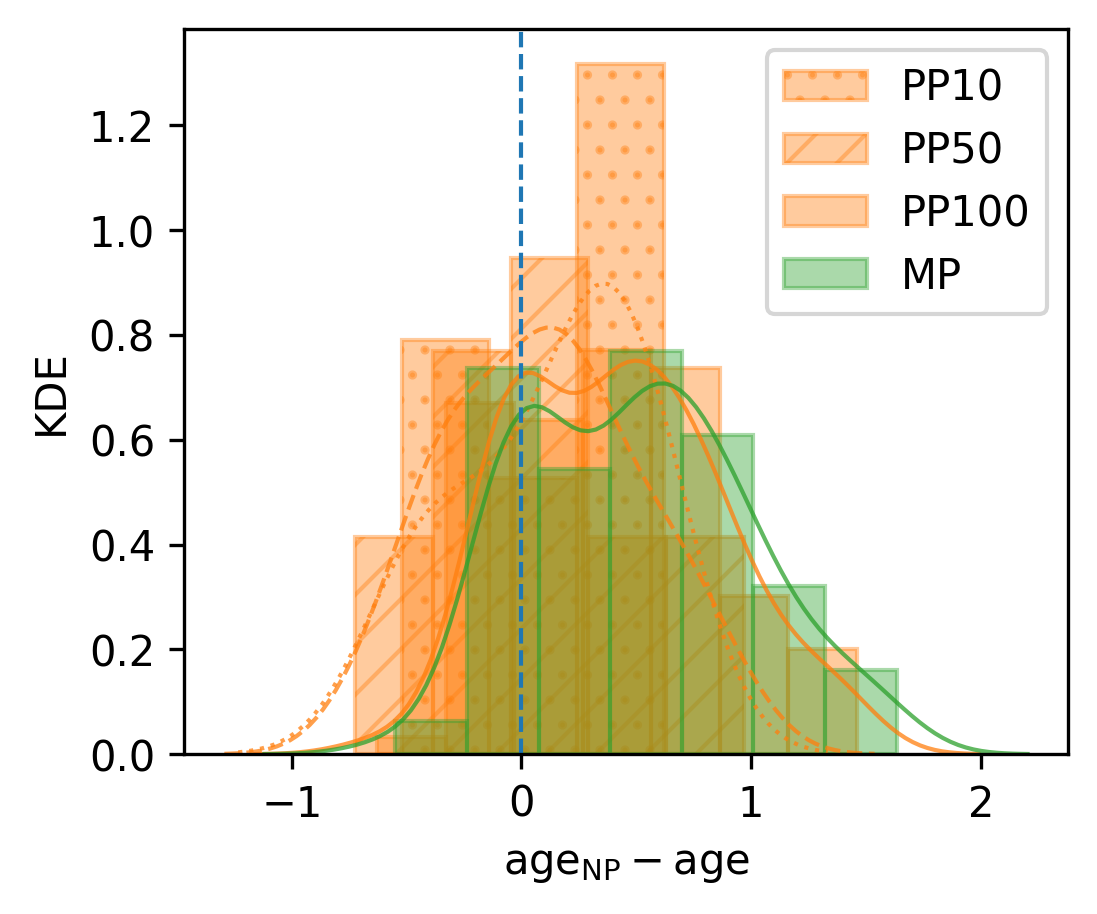

In [188]:
plot_diff('age');

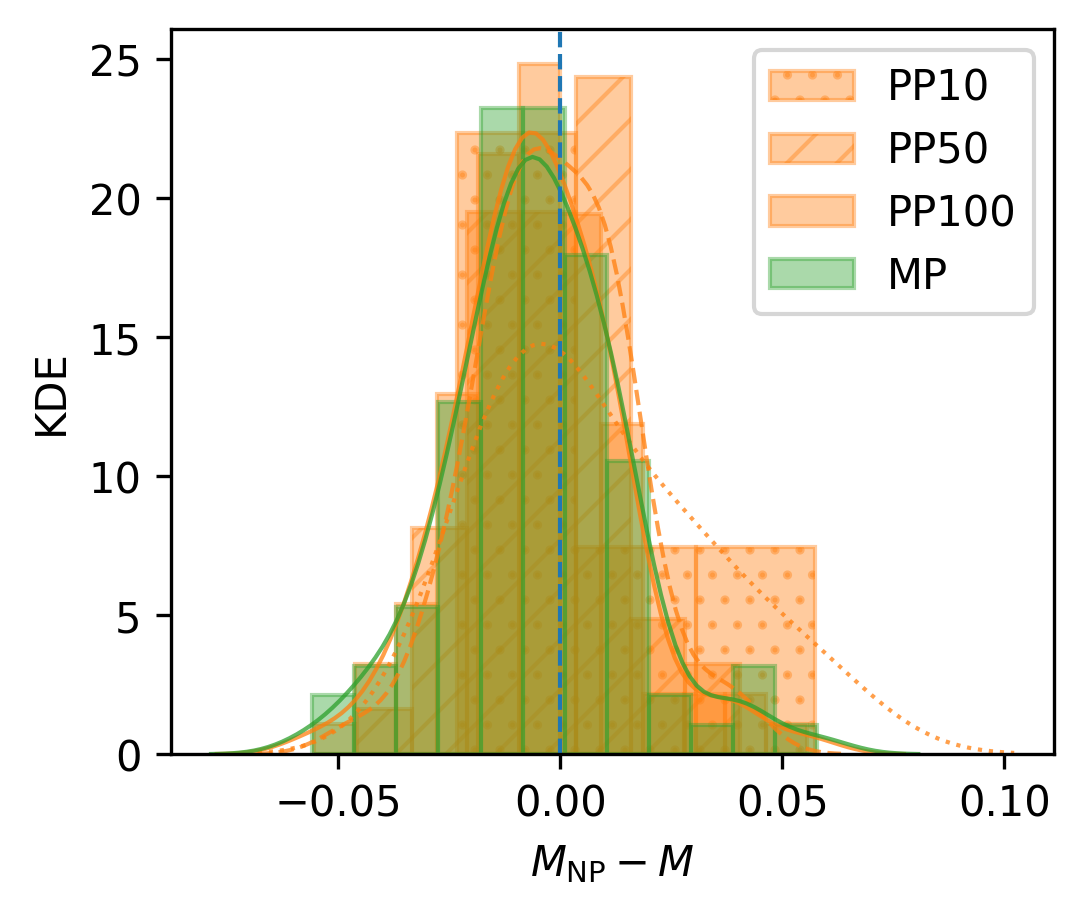

In [189]:
plot_diff('mass');

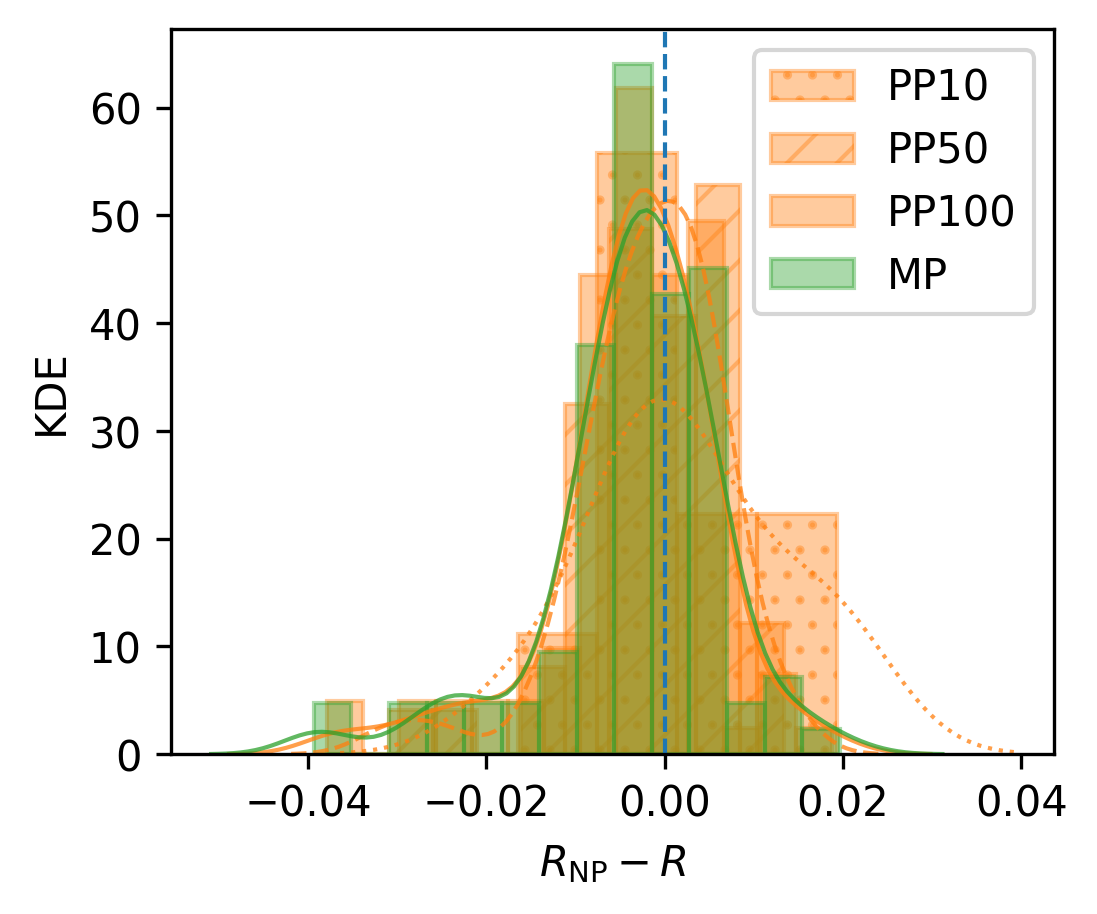

In [190]:
plot_diff('rad');

In [56]:
posteriors = {}
opt = Optimizer()

for key, path in paths_dict.items():
    opt.load_trace(os.path.join(*path.split('/')[:2], 'trace'))
    posteriors[key] = opt.trace.posterior

In [64]:
phi = ['dydz', 'yp', 'sigma_yi', 'mu_mlt', 'sigma_mlt']
phi_mp = ['dydz', 'yp', 'sigma_yi', 'mlt']

In [65]:
var_names = [f'population/{ph}' for ph in phi]
var_names_mp = [f'population/{ph}' for ph in phi_mp]

In [66]:
hyperparams = pd.read_csv('../../data/tracks/test_stars/test_stars_hyperparams.csv', names=['true'], index_col=0)
hyperparams

,true
dydz,1.8000
yp,0.2467
sigma_yi,0.0080
mu_mlt,2.0000
sigma_mlt,0.0800
m_zi,0.0160
sigma_zi,0.3000


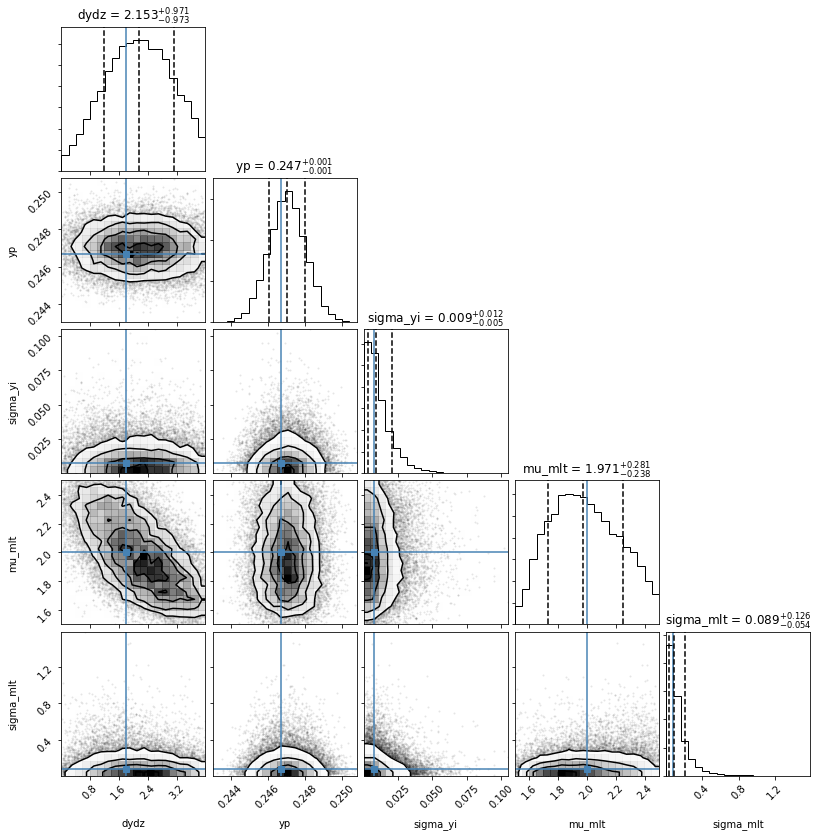

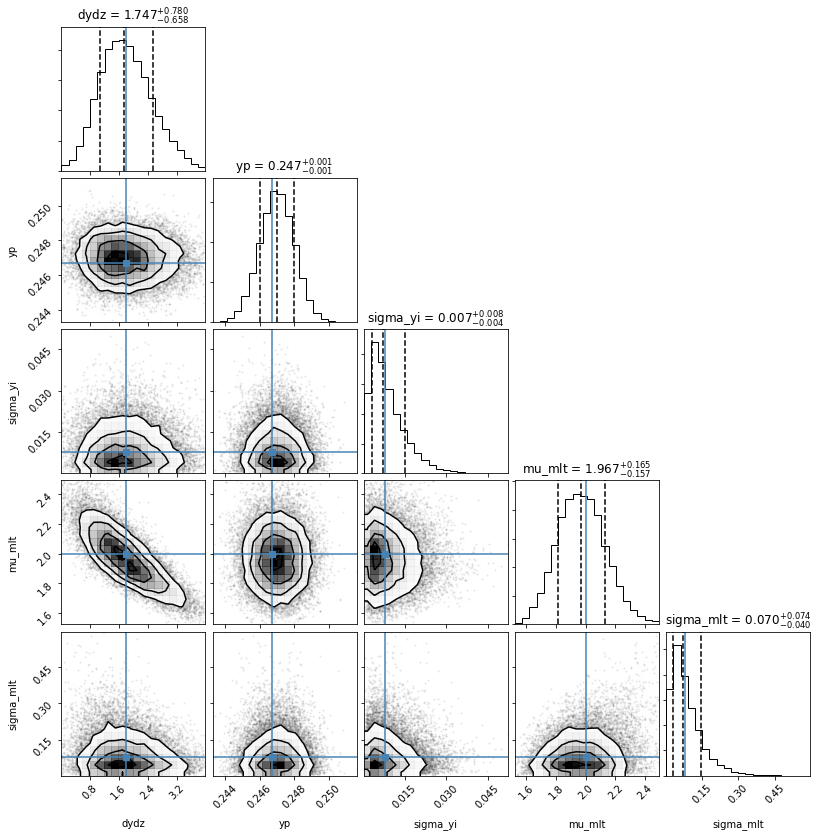

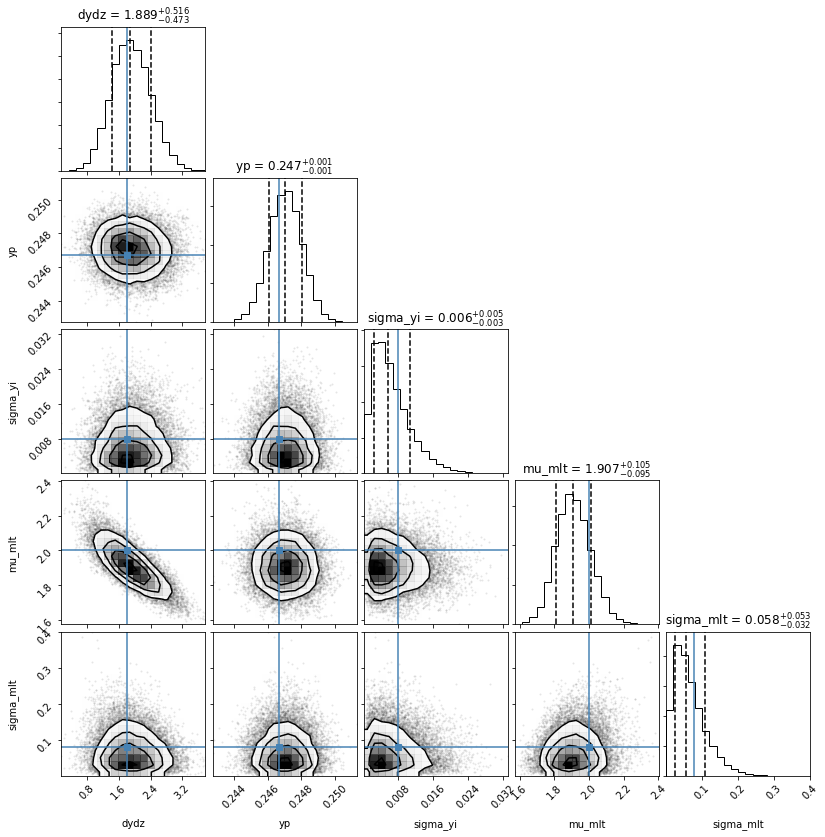

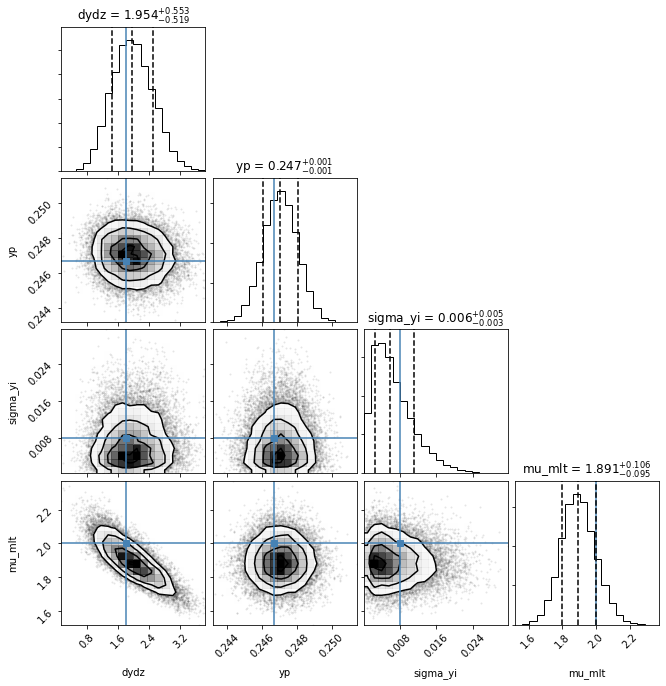

In [70]:
for key, posterior in posteriors.items():
    if key == 'NP':
        continue
        
    if key == 'MP':
        names = var_names_mp
    else:
        names = var_names
    xs = posterior[names].to_array().values
    xs = xs.reshape((xs.shape[0], np.prod(xs.shape[1:]))).T
    fig = corner(
        xs, truths=hyperparams.loc[phi, 'true'], quantiles=[.16, .5, .84],
        labels=phi, show_titles=True, title_fmt='.3f',
    )
    fig.savefig(os.path.join(*paths_dict[key].split('/')[:-1], 'corner_plot_truths.png'), bbox_inches='tight')